In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import math
import math

# Import time
import time

# Import resample
from sklearn.utils import resample

# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Import pprint
from pprint import pprint

# Import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report, accuracy_score, f1_score, r2_score, root_mean_squared_error

# Import Decision Tree Regressor and Classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

# Import RepeatedKFold for cross-validation
from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = '/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/'
results_path = '/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/results/'

In [3]:
# Import the datasets
convabuse_mlma = pd.read_csv(path + 'convabuse_mlma_merged.csv')
convabuse_mlma.head()

,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,abuse_level
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


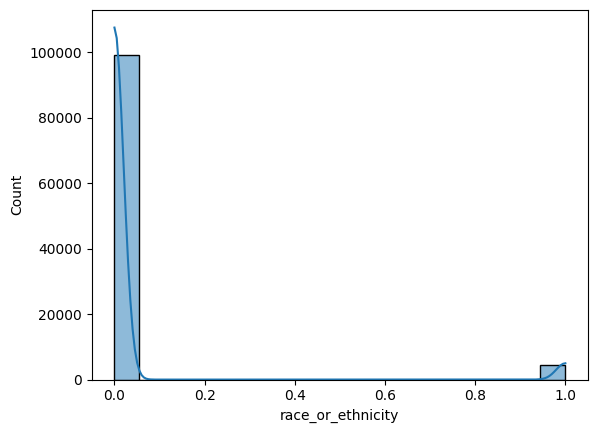

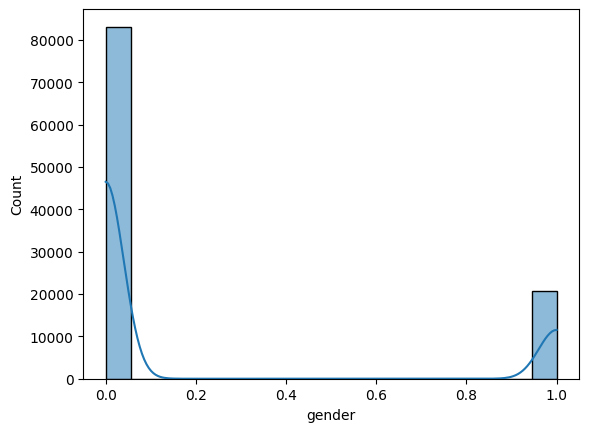

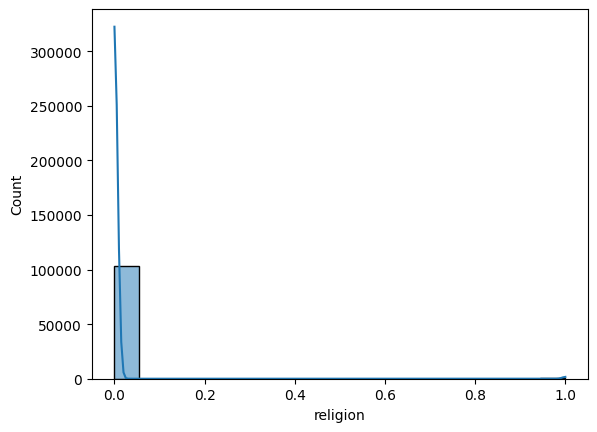

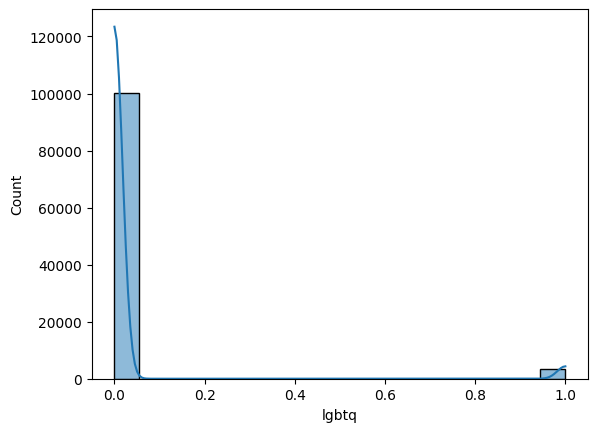

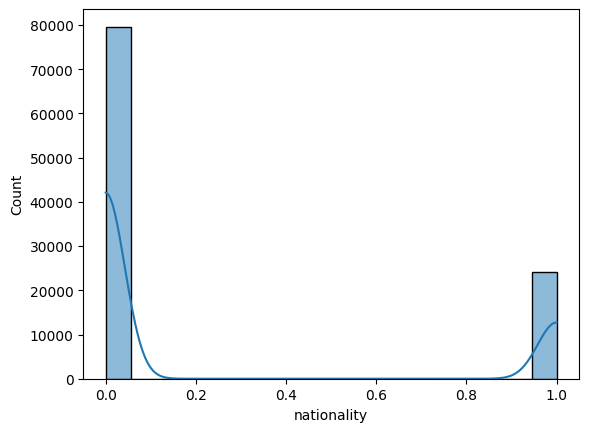

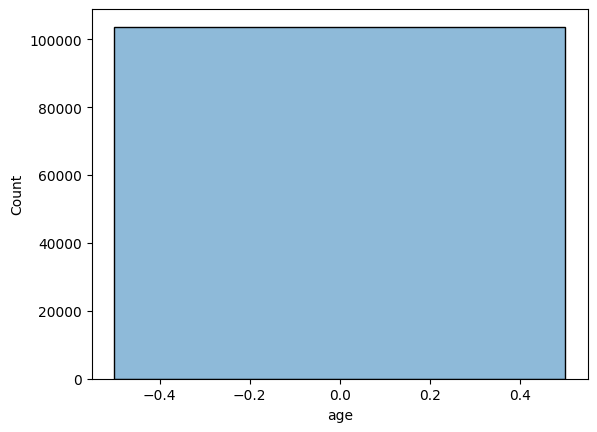

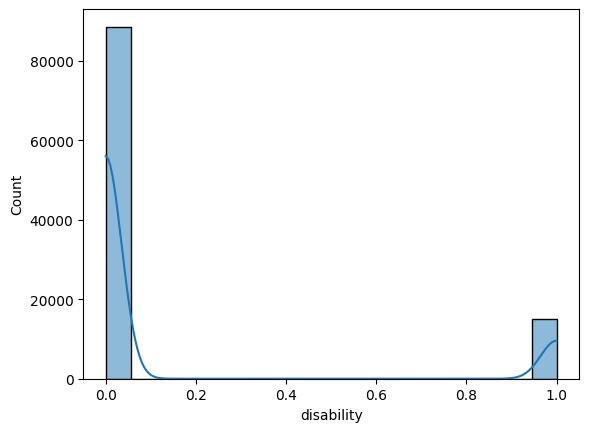

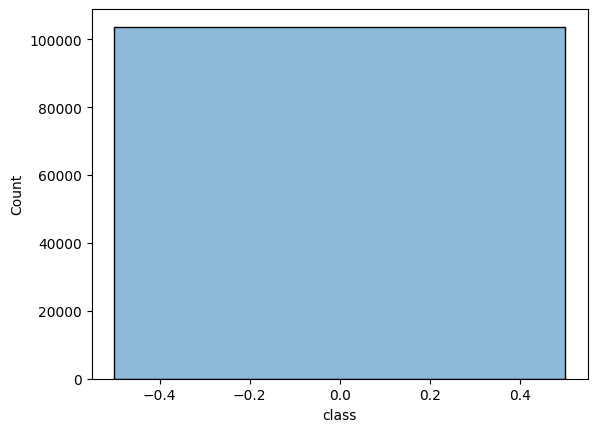

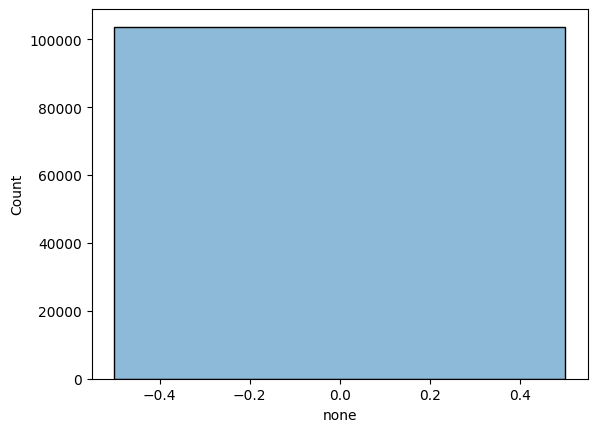

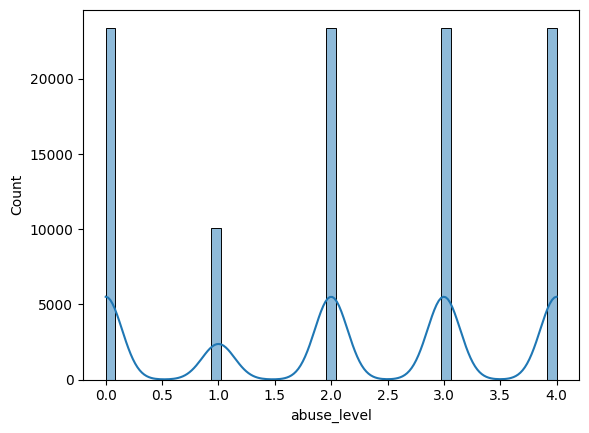

In [4]:
for column in convabuse_mlma.columns:
  sns.histplot(convabuse_mlma[column], kde=True)
  plt.show()

In [5]:
# Get the most popular abuse level
convabuse_mlma["abuse_level"].value_counts()

,count
abuse_level,
0,23407
2,23407
3,23407
4,23407
1,10068


In [6]:
# Upsample the abuse level of 1 to the length of the abuse level of 0
convabuse_mlma_4 = convabuse_mlma[convabuse_mlma["abuse_level"] == 4]
convabuse_mlma_3 = convabuse_mlma[convabuse_mlma["abuse_level"] == 3]
convabuse_mlma_2 = convabuse_mlma[convabuse_mlma["abuse_level"] == 2]
convabuse_mlma_1 = convabuse_mlma[convabuse_mlma["abuse_level"] == 1]
convabuse_mlma_0 = convabuse_mlma[convabuse_mlma["abuse_level"] == 0]
convabuse_mlma_1_upsampled = resample(convabuse_mlma_1, replace=True, n_samples=len(convabuse_mlma_0), random_state=42)

In [7]:
# Combine the upsampled abuse levels with the abuse levels for 0, 2, 3, and 4
convabuse_mlma_upsampled = pd.concat([convabuse_mlma_0, convabuse_mlma_1_upsampled, convabuse_mlma_2, convabuse_mlma_3, convabuse_mlma_4])

In [8]:
# Add the upsampled abuse level and remove the existing abuse level column from the dataset
convabuse_mlma_upsampled["abuse_level"] = convabuse_mlma_upsampled["abuse_level"].astype(int)
convabuse_mlma_upsampled

,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,abuse_level
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
103691,0,0,0,0,1,0,0,0,0,4
103692,0,0,0,0,0,0,1,0,0,4
103693,0,0,0,0,1,0,0,0,0,4
103694,1,0,0,0,1,0,0,0,0,4


In [9]:
convabuse_mlma = convabuse_mlma_upsampled

In [10]:
convabuse_mlma_X = convabuse_mlma.drop("abuse_level", axis=1)
convabuse_mlma_y = convabuse_mlma["abuse_level"]

In [11]:
convabuse_mlma_X_numeric = convabuse_mlma_X.select_dtypes(include=np.number)
convabuse_mlma_X_numeric.head()

,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [12]:
# Use standard scaler on the data
convabuse_mlma_scaler = StandardScaler()
convabuse_mlma_X_scaled = convabuse_mlma_scaler.fit_transform(convabuse_mlma_X_numeric)
convabuse_mlma_X_scaled

array([[-0.20201658, -0.46258022, -0.06757519, ..., -0.38594874,
         0.        ,  0.        ],
       [-0.20201658, -0.46258022, -0.06757519, ..., -0.38594874,
         0.        ,  0.        ],
       [-0.20201658, -0.46258022, -0.06757519, ..., -0.38594874,
         0.        ,  0.        ],
       ...,
       [-0.20201658, -0.46258022, -0.06757519, ..., -0.38594874,
         0.        ,  0.        ],
       [ 4.95008865, -0.46258022, -0.06757519, ..., -0.38594874,
         0.        ,  0.        ],
       [-0.20201658, -0.46258022, -0.06757519, ...,  2.59101765,
         0.        ,  0.        ]])

In [13]:
# Train test split for each dataset
convabuse_mlma_X_train, convabuse_mlma_X_test, convabuse_mlma_y_train, convabuse_mlma_y_test = train_test_split(convabuse_mlma_X_scaled, convabuse_mlma_y, test_size=0.2, random_state=42)

In [14]:
def linear_modeling(dataset, X_train, X_test, y_train, y_test):
  # Perform linear regression on the convabuse dataset
  linear_model = LinearRegression()
  linear_model = linear_model.fit(X_train, y_train)
  linear_y_pred = linear_model.predict(X_test)
  linear_rmse = root_mean_squared_error(y_test, linear_y_pred)
  linear_r2 = r2_score(y_test, linear_y_pred)
  print(f"RMSE: {linear_rmse}")
  print(f"R2: {linear_r2}")

  # Plot the linear model
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, linear_y_pred)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
  plt.xlabel("Actual Abuse Level")
  plt.ylabel("Predicted Abuse Level")
  plt.title(f"{dataset} Linear Model")
  plt.show()

  return linear_rmse, linear_r2

RMSE: 1.3108349521443643
R2: 0.1345942605117757


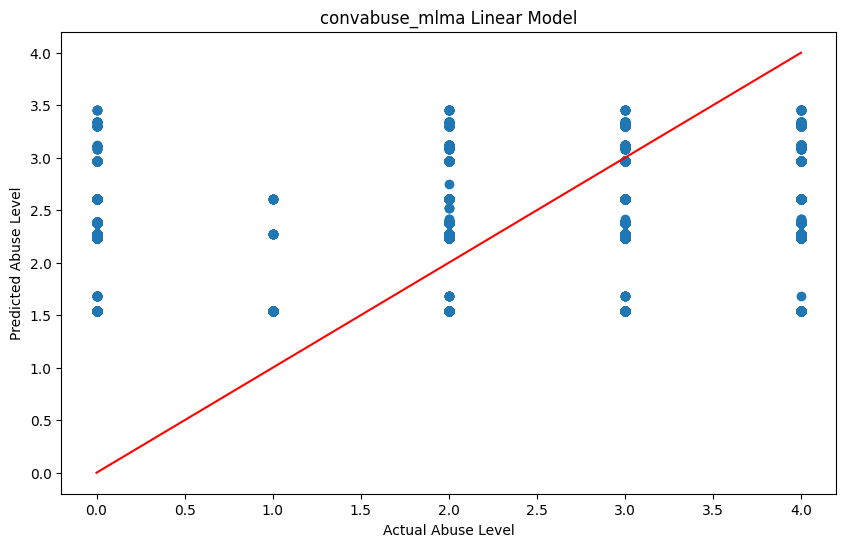

In [15]:
# Perform linear regression on the convabuse_mlma dataset
convabuse_mlma_linear_rmse, convabuse_mlma_linear_r2 = linear_modeling("convabuse_mlma", convabuse_mlma_X_train, convabuse_mlma_X_test, convabuse_mlma_y_train, convabuse_mlma_y_test)

In [16]:
# Import model1_linear-model-summary.csv
model1_linear_model_summary = pd.read_csv(results_path + "model1_linear-model-summary.csv")
model1_linear_model_summary

,Model,Dataset,RMSE,R2
0,Linear Regression,Convabuse,1.250669,0.217343
1,Linear Regression,Dynamically Generated Hate Speech,0.336534,0.546978
2,Linear Regression,Online Abusive Attacks,25.184477,0.247075
3,Linear Regression,US Elections 2020 Hate Speech,0.468635,0.121211
4,Linear Regression,MLMA Hate Speech,1.440000,0.059999


In [17]:
# Add the linear model results to the linear model summary with the model, dataset, rmse and r2
model1_linear_model_summary = pd.concat([model1_linear_model_summary, pd.DataFrame([["Linear Regression", "Convabuse MLMA", convabuse_mlma_linear_rmse, convabuse_mlma_linear_r2]], columns=["Model", "Dataset", "RMSE", "R2"])])
model1_linear_model_summary

,Model,Dataset,RMSE,R2
0,Linear Regression,Convabuse,1.250669,0.217343
1,Linear Regression,Dynamically Generated Hate Speech,0.336534,0.546978
2,Linear Regression,Online Abusive Attacks,25.184477,0.247075
3,Linear Regression,US Elections 2020 Hate Speech,0.468635,0.121211
4,Linear Regression,MLMA Hate Speech,1.440000,0.059999
0,Linear Regression,Convabuse MLMA,1.310835,0.134594


In [18]:
# Output the total linear model summary results as a CSV
model1_linear_model_summary.to_csv(results_path + "model1_linear-model-summary.csv", index=False)

In [19]:
regularizers = ["l1", "l2"]

In [20]:
solvers = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

In [21]:
l1_ratio_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [22]:
logistic_regression_model_results = []

In [23]:
convabuse_mlma_results_list = []

# Use logistic regression with L1, L2, and ElasticNet regularization with standardized features of the Convabuse dataset
for regularizer in regularizers:
  for solver in solvers:
    if regularizer == "l1" and solver not in ["liblinear", "saga"]:
      continue
    convabuse_mlma_logistic_regression = LogisticRegression(penalty=regularizer, solver=solver, random_state=42)
    convabuse_mlma_logistic_regression.fit(convabuse_mlma_X_train, convabuse_mlma_y_train)
    # Predict the target variable for the test set
    convabuse_mlma_y_pred = convabuse_mlma_logistic_regression.predict(convabuse_mlma_X_test)

    # Calculate the accuracy of the model
    convabuse_mlma_accuracy = accuracy_score(convabuse_mlma_y_test, convabuse_mlma_y_pred)
    convabuse_mlma_f1_score = f1_score(convabuse_mlma_y_test, convabuse_mlma_y_pred, average='weighted') # Weighted average due to multiclass
    convabuse_mlma_results_list.append(("Convabuse MLMA", regularizer, solver, convabuse_mlma_accuracy, convabuse_mlma_f1_score, 0))
    print(f"Regularizer: {regularizer}, Solver: {solver}, Accuracy: {convabuse_mlma_accuracy}, F1-score: {convabuse_mlma_f1_score}")

Regularizer: l1, Solver: liblinear, Accuracy: 0.3571581150937754, F1-score: 0.27173548062304825
Regularizer: l1, Solver: saga, Accuracy: 0.3571581150937754, F1-score: 0.27173548062304825
Regularizer: l2, Solver: lbfgs, Accuracy: 0.3571581150937754, F1-score: 0.27173548062304825
Regularizer: l2, Solver: liblinear, Accuracy: 0.3571581150937754, F1-score: 0.27173548062304825
Regularizer: l2, Solver: newton-cg, Accuracy: 0.3571581150937754, F1-score: 0.27173548062304825
Regularizer: l2, Solver: newton-cholesky, Accuracy: 0.3571581150937754, F1-score: 0.27173548062304825
Regularizer: l2, Solver: sag, Accuracy: 0.3571581150937754, F1-score: 0.27173548062304825
Regularizer: l2, Solver: saga, Accuracy: 0.3571581150937754, F1-score: 0.27173548062304825


In [24]:
# Convert the results list into a dataframe
convabuse_mlma_results = pd.DataFrame(convabuse_mlma_results_list, columns=["Dataset", "Regularizer", "Solver", "Accuracy", "F1-score", "Ratio"])
convabuse_mlma_results

,Dataset,Regularizer,Solver,Accuracy,F1-score,Ratio
0,Convabuse MLMA,l1,liblinear,0.357158,0.271735,0
1,Convabuse MLMA,l1,saga,0.357158,0.271735,0
2,Convabuse MLMA,l2,lbfgs,0.357158,0.271735,0
3,Convabuse MLMA,l2,liblinear,0.357158,0.271735,0
4,Convabuse MLMA,l2,newton-cg,0.357158,0.271735,0
5,Convabuse MLMA,l2,newton-cholesky,0.357158,0.271735,0
6,Convabuse MLMA,l2,sag,0.357158,0.271735,0
7,Convabuse MLMA,l2,saga,0.357158,0.271735,0


In [25]:
convabuse_mlma_best_model_params = convabuse_mlma_results.loc[convabuse_mlma_results["Accuracy"].idxmax()]
convabuse_mlma_best_model_params

,0
Dataset,Convabuse MLMA
Regularizer,l1
Solver,liblinear
Accuracy,0.357158
F1-score,0.271735
Ratio,0


In [26]:
# Use the best parameters to create a new best model
convabuse_mlma_best_model = LogisticRegression(penalty=convabuse_mlma_best_model_params["Regularizer"], solver=convabuse_mlma_best_model_params["Solver"], random_state=42)
convabuse_mlma_best_model.fit(convabuse_mlma_X_train, convabuse_mlma_y_train)

# Predict the target variable for the test set
convabuse_mlma_y_pred = convabuse_mlma_best_model.predict(convabuse_mlma_X_test)

# Calculate the accuracy of the model
convabuse_mlma_accuracy = accuracy_score(convabuse_mlma_y_test, convabuse_mlma_y_pred)
convabuse_mlma_f1_score = f1_score(convabuse_mlma_y_test, convabuse_mlma_y_pred, average='weighted')
logistic_regression_model_results.append(("Convabuse", convabuse_mlma_best_model_params["Regularizer"], convabuse_mlma_best_model_params["Solver"], convabuse_mlma_accuracy, convabuse_mlma_f1_score, 0.0))

print(f"Regularizer: {convabuse_mlma_best_model_params['Regularizer']}, Solver: {convabuse_mlma_best_model_params['Solver']}, Accuracy: {convabuse_mlma_accuracy}, F1-score: {convabuse_mlma_f1_score}")

Regularizer: l1, Solver: liblinear, Accuracy: 0.3571581150937754, F1-score: 0.27173548062304825


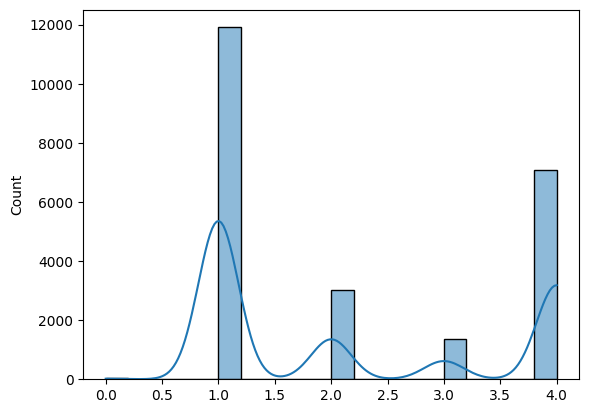

In [27]:
# Plot the predictions that were generated as a histogram using seaborn colored by correct vs incorrect predictions
sns.histplot(convabuse_mlma_y_pred, kde=True)
plt.show()

In [28]:
# Import model4_logistic-regression-summary.csv
model4_logistic_regression_summary = pd.read_csv(results_path + "model4_logistic-regression-summary.csv")
model4_logistic_regression_summary

,Dataset,Regularizer,Solver,Accuracy,F1-score,Ratio
0,Convabuse,l1,liblinear,0.332340,0.237801,0.0
1,Convabuse,l1,saga,0.332340,0.237801,0.0
2,Convabuse,l2,lbfgs,0.332340,0.237801,0.0
3,Convabuse,l2,liblinear,0.332340,0.237801,0.0
4,Convabuse,l2,newton-cg,0.332340,0.237801,0.0
...,...,...,...,...,...,...
63,MLMA Hate Speech,elasticnet,saga,0.338538,0.318268,0.5
64,MLMA Hate Speech,elasticnet,saga,0.338538,0.318268,0.6
65,MLMA Hate Speech,elasticnet,saga,0.338538,0.318268,0.7
66,MLMA Hate Speech,elasticnet,saga,0.338226,0.317551,0.8


In [29]:
# Append convabuse_mlma_results to the logistic regression summary
logistic_regression_model_results_df = pd.DataFrame(logistic_regression_model_results, columns=["Dataset", "Regularizer", "Solver", "Accuracy", "F1-score", "Ratio"])
model4_logistic_regression_summary = pd.concat([model4_logistic_regression_summary, logistic_regression_model_results_df])
model4_logistic_regression_summary

,Dataset,Regularizer,Solver,Accuracy,F1-score,Ratio
0,Convabuse,l1,liblinear,0.332340,0.237801,0.0
1,Convabuse,l1,saga,0.332340,0.237801,0.0
2,Convabuse,l2,lbfgs,0.332340,0.237801,0.0
3,Convabuse,l2,liblinear,0.332340,0.237801,0.0
4,Convabuse,l2,newton-cg,0.332340,0.237801,0.0
...,...,...,...,...,...,...
64,MLMA Hate Speech,elasticnet,saga,0.338538,0.318268,0.6
65,MLMA Hate Speech,elasticnet,saga,0.338538,0.318268,0.7
66,MLMA Hate Speech,elasticnet,saga,0.338226,0.317551,0.8
67,MLMA Hate Speech,elasticnet,saga,0.338226,0.317601,0.9


In [30]:
# Output the total logistic regression results as a CSV
model4_logistic_regression_summary.to_csv(results_path + "model4_logistic-regression-summary.csv", index=False)

In [31]:
# Get the max iteration based on log 2
convabuse_mlma_max_iter = int(np.ceil(np.log2(len(convabuse_mlma_X_train))))

In [32]:
svm_classification_results_list = []
svm_regression_results_list = []

In [33]:
# Use grid search to find the best hyperparameters for the Linear SVC model
convabuse_mlma_svm_linear_param_grid = {
    'C': np.linspace(0.1, 1, 10), # Regularization parameter
    'loss': ['squared_hinge'], # Loss function
    'max_iter': [convabuse_mlma_max_iter], #range(1, 11), # Maximum number of iterations
    'tol': [1e-4] # Tolerance for stopping criteria
}

In [34]:
convabuse_mlma_svm_linear_grid_search = GridSearchCV(svm.LinearSVC(), convabuse_mlma_svm_linear_param_grid, cv=5, scoring='accuracy')
convabuse_mlma_svm_linear_grid_search.fit(convabuse_mlma_X_train, convabuse_mlma_y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'loss': ['squared_hinge'], 'max_iter': [17],
                         'tol': [0.0001]},
             scoring='accuracy')

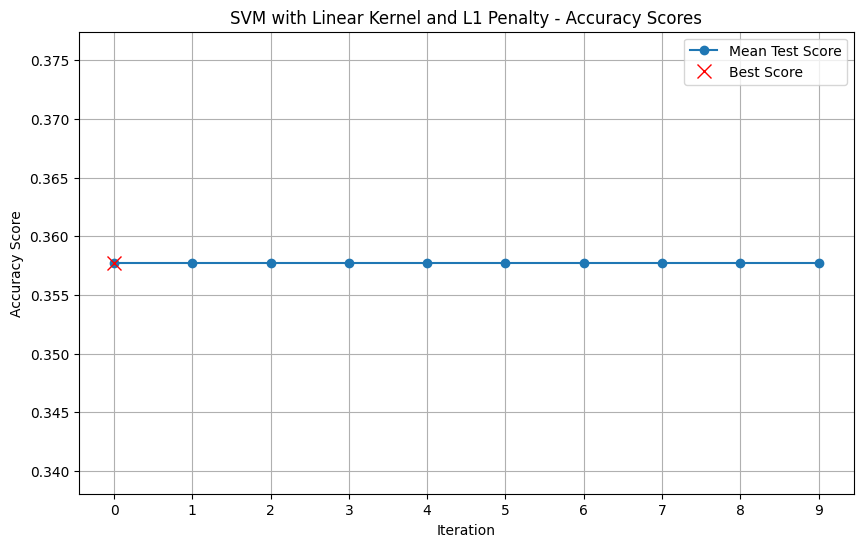

In [35]:
# Plot all accuracy scores for the SVM model with linear kernel and L1 penalty for each iteration
plt.figure(figsize=(10, 6))
plt.plot(convabuse_mlma_svm_linear_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
convabuse_mlma_linear_best_score_index = np.argmax(convabuse_mlma_svm_linear_grid_search.cv_results_['mean_test_score'])
plt.plot(convabuse_mlma_linear_best_score_index, convabuse_mlma_svm_linear_grid_search.cv_results_['mean_test_score'][convabuse_mlma_linear_best_score_index], 'rx', markersize=10, label='Best Score')

plt.title('SVM with Linear Kernel and L1 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.xticks(range(len(convabuse_mlma_svm_linear_grid_search.cv_results_['mean_test_score'])))
plt.grid()
plt.legend()
plt.show()

In [36]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(convabuse_mlma_svm_linear_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(convabuse_mlma_svm_linear_grid_search.best_score_)

Best parameters for SVM with linear kernel and L1 penalty:
{'C': np.float64(0.1), 'loss': 'squared_hinge', 'max_iter': 17, 'tol': 0.0001}
Best score for SVM with linear kernel and L1 penalty:
0.3577455812420761


In [37]:
# Train the SVM model with the best parameters
convabuse_mlma_svm_model_linear = svm.LinearSVC(**convabuse_mlma_svm_linear_grid_search.best_params_, random_state=42)
convabuse_mlma_svm_model_linear.fit(convabuse_mlma_X_train, convabuse_mlma_y_train)

LinearSVC(C=np.float64(0.1), max_iter=17, random_state=42)

In [38]:
# Print the classification report for the convabuse_svm_model_linear model
convabuse_mlma_y_pred_linear = convabuse_mlma_svm_model_linear.predict(convabuse_mlma_X_test)
print("Classification report for SVM with linear kernel and L1 penalty:")
print(classification_report(convabuse_mlma_y_test, convabuse_mlma_y_pred_linear))
print(f"F1 Score: {f1_score(convabuse_mlma_y_test, convabuse_mlma_y_pred_linear, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(convabuse_mlma_y_test, convabuse_mlma_y_pred_linear):.4f}")

Classification report for SVM with linear kernel and L1 penalty:
              precision    recall  f1-score   support

           0       0.64      0.01      0.01      4725
           1       0.40      1.00      0.57      4755
           2       0.36      0.23      0.28      4750
           3       0.29      0.09      0.13      4626
           4       0.30      0.46      0.36      4551

    accuracy                           0.36     23407
   macro avg       0.40      0.36      0.27     23407
weighted avg       0.40      0.36      0.27     23407

F1 Score: 0.2717
Accuracy: 0.3572


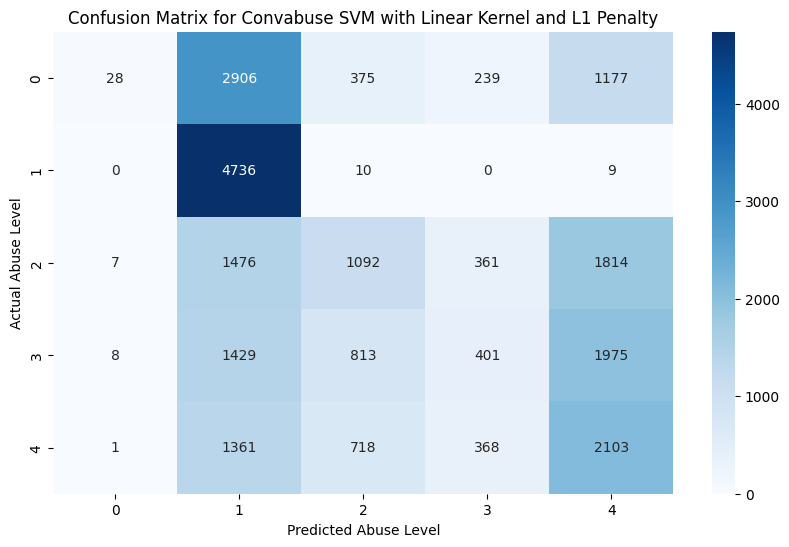

In [39]:
# Plot a heatmap of the actual vs predicted abuse levels for the convabuse_svm_model_linear model
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(convabuse_mlma_y_test, convabuse_mlma_y_pred_linear, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Convabuse SVM with Linear Kernel and L1 Penalty')
plt.xlabel('Predicted Abuse Level')
plt.ylabel('Actual Abuse Level')
plt.show()

In [40]:
svm_classification_results_list.append(("Convabuse MLMA", "Linear", "L1", accuracy_score(convabuse_mlma_y_test, convabuse_mlma_y_pred_linear), f1_score(convabuse_mlma_y_test, convabuse_mlma_y_pred_linear, average='weighted')))

In [41]:
convabuse_mlma_svm_rbf_pipeline = Pipeline([
    ("kernel", RBFSampler()),
    ("clf", SGDClassifier(loss="hinge", random_state=42, penalty="l2", tol=1e-4))
])

# Use grid search to find the best hyperparameters for the SVM model
convabuse_mlma_svm_rbf_param_grid = {
    'kernel__gamma': np.linspace(0.1, 1, 10), # Kernel coefficient,
    'kernel__n_components': range(2, convabuse_mlma_X_train.shape[1] + 1), # Number of components for the RBF kernel
    'clf__alpha': [1e-4], # Regularization parameter
    'clf__max_iter': [convabuse_mlma_max_iter], # range(330, 350), # Maximum number of iterations
    'clf__tol': [1e-4], # Tolerance for stopping criteria
    'clf__early_stopping': [True] # Whether to use early stopping
}

# Perform a grid search using the RBFSampler
convabuse_mlma_svm_rbf_grid_search = GridSearchCV(
    estimator=convabuse_mlma_svm_rbf_pipeline,
    param_grid=
    convabuse_mlma_svm_rbf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=2,
    verbose=True
)

In [42]:
# Fit the grid search to the training data
convabuse_mlma_svm_rbf_grid_search.fit(convabuse_mlma_X_train, convabuse_mlma_y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kernel', RBFSampler()),
                                       ('clf',
                                        SGDClassifier(random_state=42,
                                                      tol=0.0001))]),
             n_jobs=2,
             param_grid={'clf__alpha': [0.0001], 'clf__early_stopping': [True],
                         'clf__max_iter': [17], 'clf__tol': [0.0001],
                         'kernel__gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'kernel__n_components': range(2, 10)},
             scoring='accuracy', verbose=True)

In [43]:
# Print the best parameters and score from the grid search
print("Best parameters for SVM with RBF kernel:")
pprint(convabuse_mlma_svm_rbf_grid_search.best_params_)
print("Best score for SVM with RBF kernel:")
print(convabuse_mlma_svm_rbf_grid_search.best_score_)

Best parameters for SVM with RBF kernel:
{'clf__alpha': 0.0001,
 'clf__early_stopping': True,
 'clf__max_iter': 17,
 'clf__tol': 0.0001,
 'kernel__gamma': np.float64(0.5),
 'kernel__n_components': 8}
Best score for SVM with RBF kernel:
0.3482079531582357


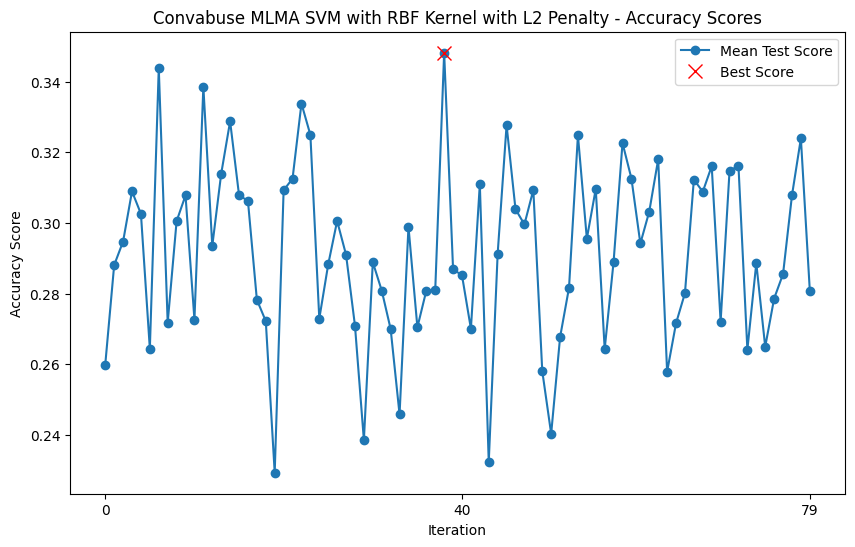

In [44]:
# Plot all accuracy scores for the SVM model with RBF kernel for each iteration
plt.figure(figsize=(10, 6))
plt.plot(convabuse_mlma_svm_rbf_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the best score
best_convabuse_mlma_svm_rbf_score_index = np.argmax(convabuse_mlma_svm_rbf_grid_search.cv_results_['mean_test_score'])
plt.plot(best_convabuse_mlma_svm_rbf_score_index, convabuse_mlma_svm_rbf_grid_search.cv_results_['mean_test_score'][best_convabuse_mlma_svm_rbf_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Convabuse MLMA SVM with RBF Kernel with L2 Penalty - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')

# Only plot x-axis ticks of 0, the median, and the last iteration
plt.xticks([0, len(convabuse_mlma_svm_rbf_grid_search.cv_results_['mean_test_score']) // 2, len(convabuse_mlma_svm_rbf_grid_search.cv_results_['mean_test_score']) - 1])

plt.legend()
plt.show()

In [45]:
# Train the SVM model with the best parameters
convabuse_mlma_svm_model_rbf = convabuse_mlma_svm_rbf_grid_search.best_estimator_
convabuse_mlma_svm_model_rbf.fit(convabuse_mlma_X_train, convabuse_mlma_y_train)

Pipeline(steps=[('kernel', RBFSampler(gamma=np.float64(0.5), n_components=8)),
                ('clf',
                 SGDClassifier(early_stopping=True, max_iter=17,
                               random_state=42, tol=0.0001))])

In [46]:
# Print the classification report for the convabuse_svm_model_rbf model
convabuse_mlma_y_pred_rbf = convabuse_mlma_svm_model_rbf.predict(convabuse_mlma_X_test)
print("Classification report for SVM with RBF kernel:")
print(classification_report(convabuse_mlma_y_test, convabuse_mlma_y_pred_rbf))
print(f"F1 Score: {f1_score(convabuse_mlma_y_test, convabuse_mlma_y_pred_rbf, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(convabuse_mlma_y_test, convabuse_mlma_y_pred_rbf):.4f}")

Classification report for SVM with RBF kernel:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4725
           1       0.00      0.00      0.00      4755
           2       0.32      0.45      0.37      4750
           3       0.00      0.00      0.00      4626
           4       0.16      0.57      0.25      4551

    accuracy                           0.20     23407
   macro avg       0.09      0.20      0.12     23407
weighted avg       0.09      0.20      0.12     23407

F1 Score: 0.1230
Accuracy: 0.2023


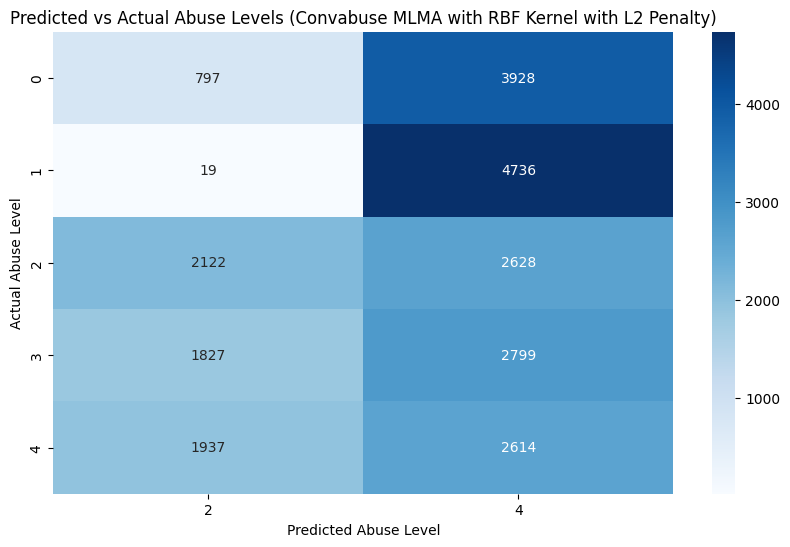

In [47]:
# Plot a heatmap of the predicted vs actual abuse levels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(convabuse_mlma_y_test, convabuse_mlma_y_pred_rbf), annot=True, fmt='d', cmap='Blues')
plt.title('Predicted vs Actual Abuse Levels (Convabuse MLMA with RBF Kernel with L2 Penalty)')
plt.xlabel('Predicted Abuse Level')
plt.ylabel('Actual Abuse Level')
plt.show()

In [48]:
svm_classification_results_list.append(("Convabuse", "RBF", "L2", accuracy_score(convabuse_mlma_y_test, convabuse_mlma_y_pred_rbf), f1_score(convabuse_mlma_y_test, convabuse_mlma_y_pred_rbf, average='weighted')))

In [49]:
# Loop through the parameter grid and train the SVM model
def svm_grid_search(X_train, X_test, y_train, y_test, param_grid, model_name):
    """Train an SVM model using GridSearchCV and print the classification report."""
    # Create the SVM model
    svm_model = svm.SVC()

    # Create the GridSearchCV object
    grid_search = GridSearchCV(svm_model, param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Print out the parameters that were tested:
    print(f"Parameters tested for {model_name}:")
    pprint(grid_search.cv_results_['params'])

    # Print the classification report
    print(f"Best parameters for {model_name}:", grid_search.best_params_)
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    return grid_search, best_model # Return the grid_search object

In [50]:
convabuse_mlma_custom_param_grid = {
    "C": np.linspace(0.1, 1, 10),
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"],
    "tol": [1e-4],
    "max_iter": range(1, convabuse_mlma_max_iter), # range(2960, 3000),
    "class_weight": ["balanced", None]
}

In [51]:
# Train and evaluate the SVM model on the US Accidents Upsampled dataset
convabuse_mlma_custom_svm_grid_search, convabuse_mlma_custom_svm_model = svm_grid_search(convabuse_mlma_X_train, convabuse_mlma_X_test, convabuse_mlma_y_train, convabuse_mlma_y_test, convabuse_mlma_custom_param_grid, "convabuse_mlma_custom_svm_model")

Streaming output truncated to the last 5000 lines.
  'gamma': 'scale',
  'kernel': 'linear',
  'max_iter': 2,
  'tol': 0.0001},
 {'C': np.float64(0.4),
  'class_weight': None,
  'gamma': 'scale',
  'kernel': 'linear',
  'max_iter': 3,
  'tol': 0.0001},
 {'C': np.float64(0.4),
  'class_weight': None,
  'gamma': 'scale',
  'kernel': 'linear',
  'max_iter': 4,
  'tol': 0.0001},
 {'C': np.float64(0.4),
  'class_weight': None,
  'gamma': 'scale',
  'kernel': 'linear',
  'max_iter': 5,
  'tol': 0.0001},
 {'C': np.float64(0.4),
  'class_weight': None,
  'gamma': 'scale',
  'kernel': 'linear',
  'max_iter': 6,
  'tol': 0.0001},
 {'C': np.float64(0.4),
  'class_weight': None,
  'gamma': 'scale',
  'kernel': 'linear',
  'max_iter': 7,
  'tol': 0.0001},
 {'C': np.float64(0.4),
  'class_weight': None,
  'gamma': 'scale',
  'kernel': 'linear',
  'max_iter': 8,
  'tol': 0.0001},
 {'C': np.float64(0.4),
  'class_weight': None,
  'gamma': 'scale',
  'kernel': 'linear',
  'max_iter': 9,
  'tol': 0.0001

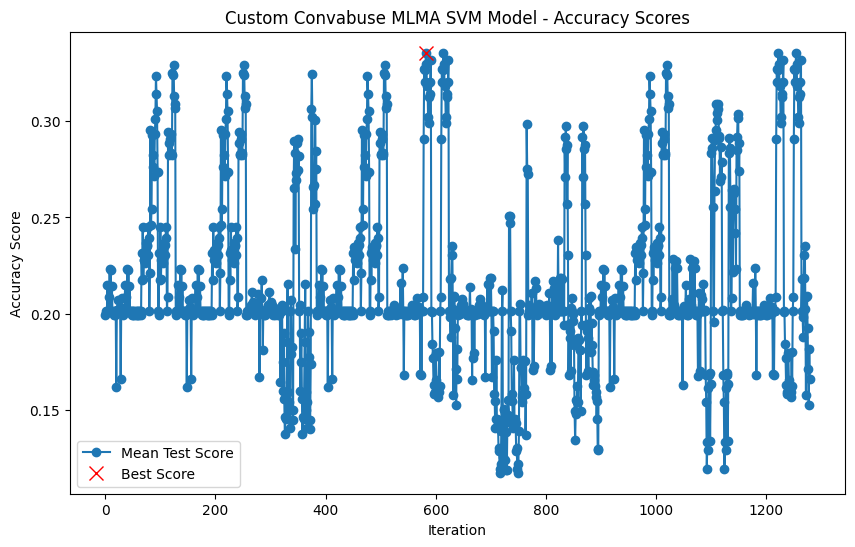

In [52]:
# Plot all accuracy scores for the custom SVM model
plt.figure(figsize=(10, 6))
plt.plot(convabuse_mlma_custom_svm_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot a red x at the maximum accuracy score
best_convabuse_mlma_custom_svm_score_index = np.argmax(convabuse_mlma_custom_svm_grid_search.cv_results_['mean_test_score'])
plt.plot(best_convabuse_mlma_custom_svm_score_index, convabuse_mlma_custom_svm_grid_search.cv_results_['mean_test_score'][best_convabuse_mlma_custom_svm_score_index], 'rx', markersize=10, label='Best Score')

plt.title('Custom Convabuse MLMA SVM Model - Accuracy Scores')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [53]:
# Print the best parameters and score from the grid search using the pickled model
print("Best parameters for SVM with linear kernel and L1 penalty:")
pprint(convabuse_mlma_custom_svm_grid_search.best_params_)
print("Best score for SVM with linear kernel and L1 penalty:")
print(convabuse_mlma_custom_svm_grid_search.best_score_)

# Get the best kernel
best_convabuse_mlma_custom_kernel = convabuse_mlma_custom_svm_grid_search.best_params_['kernel']

Best parameters for SVM with linear kernel and L1 penalty:
{'C': np.float64(0.5),
 'class_weight': None,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': 7,
 'tol': 0.0001}
Best score for SVM with linear kernel and L1 penalty:
0.33560473362669285


In [54]:
# Train the SVM model with the best parameters
convabuse_mlma_custom_svm_best_model = convabuse_mlma_custom_svm_grid_search.best_estimator_
convabuse_mlma_custom_svm_best_model.fit(convabuse_mlma_X_train, convabuse_mlma_y_train)

SVC(C=np.float64(0.5), kernel='linear', max_iter=7, tol=0.0001)

In [55]:
# Use the model to make predictions on the test set
convabuse_mlma_custom_y_pred = convabuse_mlma_custom_svm_model.predict(convabuse_mlma_X_test)

# Print the classification report
print("Classification report for Convabuse MLMA dataset with L1 regularization:")
print(classification_report(convabuse_mlma_y_test, convabuse_mlma_custom_y_pred))

Classification report for Convabuse MLMA dataset with L1 regularization:
              precision    recall  f1-score   support

           0       0.10      0.06      0.08      4725
           1       0.40      1.00      0.57      4755
           2       0.29      0.02      0.03      4750
           3       0.28      0.18      0.22      4626
           4       0.31      0.36      0.33      4551

    accuracy                           0.33     23407
   macro avg       0.28      0.32      0.25     23407
weighted avg       0.28      0.33      0.25     23407



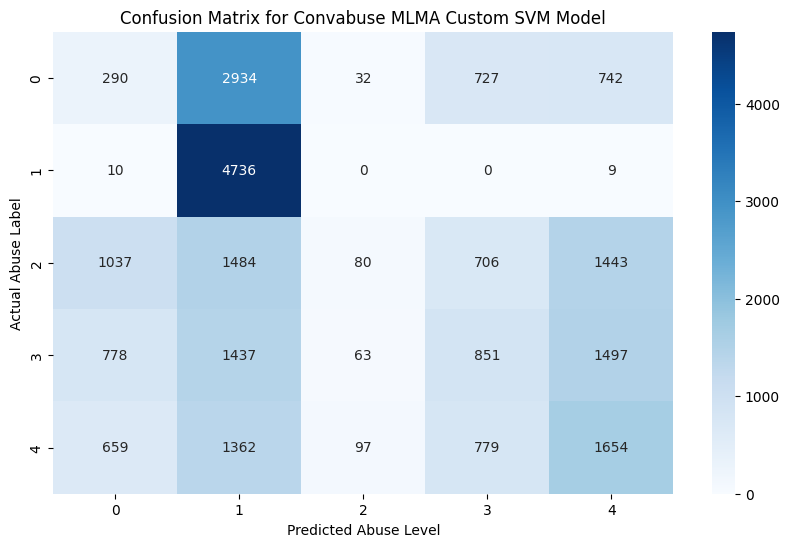

In [56]:
# Plot a heatmap of the predicted vs actual abuse levels
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(convabuse_mlma_y_test, convabuse_mlma_custom_y_pred, rownames=['Actual Abuse Label'], colnames=['Predicted Abuse Level']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Convabuse MLMA Custom SVM Model')
plt.show()

In [57]:
# Get the custom model's accuracy and f1-score
convabuse_mlma_custom_accuracy = accuracy_score(convabuse_mlma_y_test, convabuse_mlma_custom_y_pred)
convabuse_mlma_custom_f1_score = f1_score(convabuse_mlma_y_test, convabuse_mlma_custom_y_pred, average='weighted')
print(f"Custom SVM Model Accuracy: {convabuse_mlma_custom_accuracy}")
print(f"Custom SVM Model F1-Score: {convabuse_mlma_custom_f1_score}")

Custom SVM Model Accuracy: 0.3251591404280771
Custom SVM Model F1-Score: 0.24598370118495563


In [58]:
svm_classification_results_list.append(("Convabuse", best_convabuse_mlma_custom_kernel, "L1", convabuse_mlma_custom_accuracy, convabuse_mlma_custom_f1_score))

In [59]:
svm_classification_results_list

[('Convabuse MLMA', 'Linear', 'L1', 0.3571581150937754, 0.27173548062304825),
 ('Convabuse', 'RBF', 'L2', 0.202332635536378, 0.1230247751228776),
 ('Convabuse', 'linear', 'L1', 0.3251591404280771, 0.24598370118495563)]

In [60]:
# Import model5_svm-classification-summary.csv
model5_svm_classification_summary = pd.read_csv(results_path + "model5_svm-classification-summary.csv")
model5_svm_classification_summary

,Dataset,Kernel,Regularization,Accuracy,F1 Score
0,Convabuse,Linear,L1,0.332340,0.237801
1,Convabuse,RBF,L2,0.329559,0.233832
2,Convabuse,linear,L1,0.195769,0.064102
3,Dynamically Generated Hate Speech,Linear,L1,0.834871,0.830289
4,Dynamically Generated Hate Speech,RBF,L2,0.816157,0.809785
5,Dynamically Generated Hate Speech,poly,L1,0.591197,0.574979
6,US Elections 2020 Election Hate Speech,Linear,L1,0.637311,0.637304
7,US Elections 2020 Election Hate Speech,RBF,L2,0.700758,0.699878
8,US Elections 2020 Election Hate Speech,rbf,L1,0.600379,0.586704
9,MLMA Hate Speech,Linear,L1,0.341642,0.317265


In [61]:
# Concatenate the svc_classification_results_list to the model 5 svm classification summary results
svm_classification_results_df = pd.DataFrame(svm_classification_results_list, columns=["Dataset", "Kernel", "Penalty", "Accuracy", "F1-score"])
model5_svm_classification_summary = pd.concat([model5_svm_classification_summary, svm_classification_results_df])
model5_svm_classification_summary

,Dataset,Kernel,Regularization,Accuracy,F1 Score,Penalty,F1-score
0,Convabuse,Linear,L1,0.332340,0.237801,NaN,NaN
1,Convabuse,RBF,L2,0.329559,0.233832,NaN,NaN
2,Convabuse,linear,L1,0.195769,0.064102,NaN,NaN
3,Dynamically Generated Hate Speech,Linear,L1,0.834871,0.830289,NaN,NaN
4,Dynamically Generated Hate Speech,RBF,L2,0.816157,0.809785,NaN,NaN
5,Dynamically Generated Hate Speech,poly,L1,0.591197,0.574979,NaN,NaN
6,US Elections 2020 Election Hate Speech,Linear,L1,0.637311,0.637304,NaN,NaN
7,US Elections 2020 Election Hate Speech,RBF,L2,0.700758,0.699878,NaN,NaN
8,US Elections 2020 Election Hate Speech,rbf,L1,0.600379,0.586704,NaN,NaN
9,MLMA Hate Speech,Linear,L1,0.341642,0.317265,NaN,NaN


In [62]:
# Output the model 5 svm classification summary results as a csv file
model5_svm_classification_summary.to_csv(results_path + "model5_svm-classification-summary.csv", index=False)

In [78]:
dt_classification_results_list = []

In [79]:
convabuse_mlma_kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

In [80]:
# Get the length of each dataset
convabuse_mlma_length = len(convabuse_mlma_X_train)
convabuse_mlma_log2 = math.ceil(math.log2(convabuse_mlma_length))
convabuse_mlma_1_percent = math.ceil(convabuse_mlma_length * 0.01)
convabuse_mlma_length, convabuse_mlma_log2, convabuse_mlma_1_percent

(93628, 17, 937)

In [81]:
convabuse_mlma_y_test.value_counts()

,count
abuse_level,
1,4755
2,4750
0,4725
3,4626
4,4551


In [82]:
# Decision Tree Classifier pipeline for Convabuse dataset
convabuse_mlma_dt_pipeline = Pipeline([
    ('dt_classifier', DecisionTreeClassifier(random_state=42))
])

# Set the parameters for Randomized Search for Decision Tree Classifier on the Convabuse dataset
convabuse_mlma_dt_param_grid = {
    'dt_classifier__max_depth': range(1, convabuse_mlma_log2),
    'dt_classifier__min_samples_split': range(convabuse_mlma_1_percent * 2, convabuse_mlma_1_percent * 5 + 1),
    'dt_classifier__min_samples_leaf': range(convabuse_mlma_1_percent * 1, convabuse_mlma_1_percent * 5 + 1),
    'dt_classifier__criterion': ['gini', 'entropy']
}

In [83]:
start_time = time.time()
convabuse_class_scorer = make_scorer(accuracy_score, greater_is_better=True)

convabuse_mlma_dt_random_search = RandomizedSearchCV(convabuse_mlma_dt_pipeline,
                                                   param_distributions=convabuse_mlma_dt_param_grid,
                                                   n_iter=10,
                                                   cv=convabuse_mlma_kf,
                                                   scoring=convabuse_class_scorer,
                                                   random_state=42)
convabuse_mlma_dt_random_search.fit(convabuse_mlma_X_train, convabuse_mlma_y_train)
end_time = time.time()
print("Best parameters for Convabuse MLMA Decision Tree Classifier:", convabuse_mlma_dt_random_search.best_params_)
print("Best score for Convabuse MLMA Decision Tree Classifier:", convabuse_mlma_dt_random_search.best_score_)
print("Time taken for Convabuse MLMA Decision Tree Classifier Randomized Search:", end_time - start_time)

Best parameters for Convabuse MLMA Decision Tree Classifier: {'dt_classifier__min_samples_split': 2349, 'dt_classifier__min_samples_leaf': 1298, 'dt_classifier__max_depth': 13, 'dt_classifier__criterion': 'gini'}
Best score for Convabuse MLMA Decision Tree Classifier: 0.35846112284427223
Time taken for Convabuse MLMA Decision Tree Classifier Randomized Search: 13.531497716903687


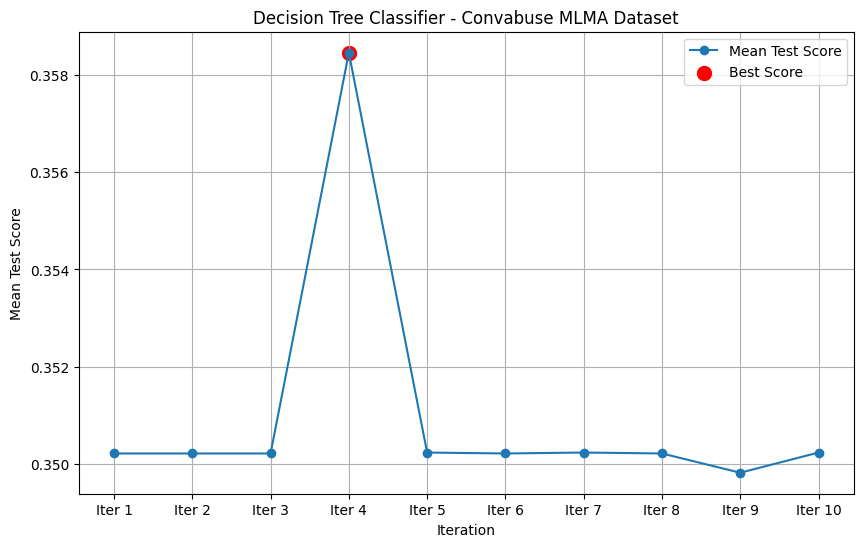

In [84]:
# Plot the accuracy scores for the Decision Tree Classifier on the Convabuse MLMA dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(convabuse_mlma_dt_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
convabuse_mlma_dt_best_score_index = np.argmax(convabuse_mlma_dt_random_search.cv_results_['mean_test_score'])
plt.scatter(convabuse_mlma_dt_best_score_index, convabuse_mlma_dt_random_search.cv_results_['mean_test_score'][convabuse_mlma_dt_best_score_index], color='red', s=100, label='Best Score')

plt.title('Decision Tree Classifier - Convabuse MLMA Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(convabuse_mlma_dt_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(convabuse_mlma_dt_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [85]:
# Predict on the test set
convabuse_mlma_dt_y_pred = convabuse_mlma_dt_random_search.predict(convabuse_mlma_X_test)

In [86]:
# Evaluate the model
convabuse_mlma_dt_accuracy = accuracy_score(convabuse_mlma_y_test, convabuse_mlma_dt_y_pred)
convabuse_mlma_dt_f1 = f1_score(convabuse_mlma_y_test, convabuse_mlma_dt_y_pred, average='weighted')

print("Convabuse Decision Tree Classifier:")
print(f"Best Parameters: {convabuse_mlma_dt_random_search.best_params_}")
print(f"Accuracy: {convabuse_mlma_dt_accuracy:.4f}")
print(f"F1 Score: {convabuse_mlma_dt_f1:.4f}")

Convabuse Decision Tree Classifier:
Best Parameters: {'dt_classifier__min_samples_split': 2349, 'dt_classifier__min_samples_leaf': 1298, 'dt_classifier__max_depth': 13, 'dt_classifier__criterion': 'gini'}
Accuracy: 0.3605
F1 Score: 0.2853


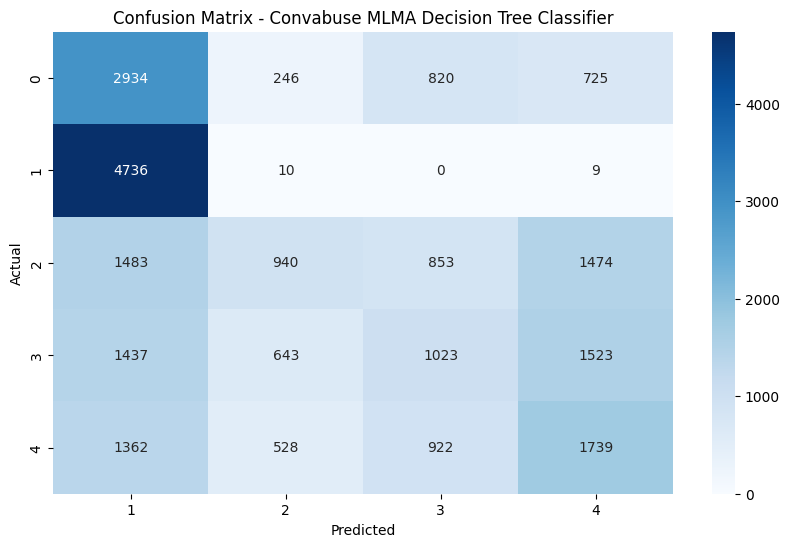

In [87]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(convabuse_mlma_y_test, convabuse_mlma_dt_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Convabuse MLMA Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [88]:
# Generate a classification report for the Decision Tree Classifier on the Convabuse MLMA dataset
convabuse_mlma_dt_report = classification_report(convabuse_mlma_y_test, convabuse_mlma_dt_y_pred)
print("Classification Report for Convabuse MLMA Decision Tree Classifier:")
print(convabuse_mlma_dt_report)

Classification Report for Convabuse MLMA Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4725
           1       0.40      1.00      0.57      4755
           2       0.40      0.20      0.26      4750
           3       0.28      0.22      0.25      4626
           4       0.32      0.38      0.35      4551

    accuracy                           0.36     23407
   macro avg       0.28      0.36      0.29     23407
weighted avg       0.28      0.36      0.29     23407



In [89]:
# Append details to the results list
dt_classification_results_list.append((
    "Decision Tree",
    "Convabuse MLMA",
    "NaN",
    "NaN",
    convabuse_mlma_dt_accuracy,
    convabuse_mlma_dt_f1,
    0.0,
    convabuse_mlma_dt_random_search.best_params_
))

In [101]:
# Import model6_dt-classification-summary.csv
model6_dt_classification_summary = pd.read_csv(results_path + "model6_dt-classification-summary.csv")
model6_dt_classification_summary

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,Decision Tree,Convabuse,NaN,NaN,0.331545,0.236767,0.0,"{'dt_classifier__min_samples_split': 1612, 'dt..."
1,Decision Tree,Dynamically Generated Hate Speech,NaN,NaN,0.834871,0.830289,0.0,"{'dt_classifier__min_samples_split': 1520, 'dt..."
2,Decision Tree,US Elections 2020 Hate Speech,NaN,NaN,0.703598,0.702632,0.0,"{'dt_classifier__min_samples_split': 215, 'dt_..."
3,Decision Tree,MLMA Hate Speech,NaN,NaN,0.350825,0.340785,0.0,"{'dt_classifier__min_samples_split': 1708, 'dt..."
4,Decision Tree,Convabuse MLMA,NaN,NaN,0.360490,0.285307,0.0,"{'dt_classifier__min_samples_split': 2349, 'dt..."


In [103]:
# # Remove the final entry from the model 6 dt classification summary
# model6_dt_classification_summary = model6_dt_classification_summary.iloc[:-1]
# model6_dt_classification_summary

In [104]:
# Concatenate the dt_classification_results_list to the model 6 dt classification summary
dt_classification_results_df = pd.DataFrame(dt_classification_results_list, columns=["Model", "Dataset", "Kernel", "Regularization", "Accuracy", "F1-score", "Ratio", "Best Parameters"])
model6_dt_classification_summary = pd.concat([model6_dt_classification_summary, dt_classification_results_df])
model6_dt_classification_summary = model6_dt_classification_summary.reset_index(drop=True)
model6_dt_classification_summary

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,Decision Tree,Convabuse,NaN,NaN,0.331545,0.236767,0.0,"{'dt_classifier__min_samples_split': 1612, 'dt..."
1,Decision Tree,Dynamically Generated Hate Speech,NaN,NaN,0.834871,0.830289,0.0,"{'dt_classifier__min_samples_split': 1520, 'dt..."
2,Decision Tree,US Elections 2020 Hate Speech,NaN,NaN,0.703598,0.702632,0.0,"{'dt_classifier__min_samples_split': 215, 'dt_..."
3,Decision Tree,MLMA Hate Speech,NaN,NaN,0.350825,0.340785,0.0,"{'dt_classifier__min_samples_split': 1708, 'dt..."
4,Decision Tree,Convabuse MLMA,NaN,NaN,0.360490,0.285307,0.0,"{'dt_classifier__min_samples_split': 2349, 'dt..."


In [105]:
# Output the updated model 6 dt classification summary results as a CSV
model6_dt_classification_summary.to_csv(results_path + "model6_dt-classification-summary.csv", index=False)